# Metodo do quadrado minimo

Importando libs necessárias

In [715]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Coeficiente de Correlação

$$
r_{x,y} = \frac
{n.\sum xy - (\sum x).(\sum y)}
{\sqrt{[n. \sum x^2 - (\sum x)^2].[n. \sum y^2 - (\sum y)^2]}}
$$



In [716]:
def correlationCoefficient(sumList, n):
  numerator = (n * sumList["xy"] - sumList["x"]*sumList["y"]) 
  denominator = (math.sqrt( (n * sumList["x²"]-sumList["x"]**2 ) * ( n * sumList["y²"]-sumList["y"]**2) ))
  r = numerator / denominator 

  return r

## Gerando tabela 

In [717]:
def GenerateWorkTable(table):
  #x
  xValue = table.x
  #y
  yValue = table.y
  
  x2Value, y2Value, xyValue = list(),list(),list()
  sumX, sumY, sumX2, sumY2, sumXY = 0,0,0,0,0

  for i in range(len(xValue)):
    # add x²
    x2Value.append(xValue[i]**2)
    # add y²
    y2Value.append(yValue[i]**2)
    # add xy
    xyValue.append(xValue[i]*yValue[i])

    sumX += xValue[i]
    sumY += yValue[i]
    sumX2 += x2Value[i]
    sumY2 += y2Value[i]
    sumXY += xyValue[i]
  
  sumList = {"x":sumX, "y":sumY, "x²":sumX2, "y²":sumY2, "xy":sumXY}

  n=len(xValue)

  workTable = pd.DataFrame({
      "x":xValue,
      "y":yValue,
      "x²":x2Value,
      "y²":y2Value,
      "xy":xyValue
  })
  workTable.index += 1

  
  return workTable, sumList, n

## Resolução do Método dos Mínimos quadrados

$$
\begin{cases}
a\sum x^2 + b. \sum x= \sum xy \\
a\sum x + b.n= \sum y
\end{cases}
$$

resolvendo o Método dos Mínimos quadrados

In [718]:
from pandas.io.formats import printing
def LinearSystem(matrixCoef, independentTerm):

  matrixCoefx = np.array([independentTerm]) 
    
  # adding respective column and line
  for i in range(len(matrixCoef)):
    line = list()

    for j in range(len(matrixCoef[i])):
      #create line values

      if(j == 0): 
        line.append(independentTerm[i]) # adding independent term how firs column in line
      else:
        line.append(matrixCoef[i][j]) # adding rest values
            
      if(j == len(matrixCoef[i])-1):
        matrixCoefx = np.vstack([matrixCoefx,line]) #adding line to matrixCoefx  

  #delete shape reference line
  matrixCoefx = np.delete(matrixCoefx, 0, 0)

  detMatrixCoef = np.linalg.det(matrixCoef)
  detMatrixCoefx = np.linalg.det(matrixCoefx)

  if detMatrixCoef !=0: 
    solve = np.linalg.solve(matrixCoef,independentTerm)  # solving linear system if is be possible and determined
  else:
    if detMatrixCoef ==0 and detMatrixCoefx ==0:
      print("SPI: Sistema Possivel e Indeterminado")
    else:
      print("SI: Sistema Impossivel")


  return solve

Gerando um gráfico com os valores dados e a regressão linear gerada.

In [719]:
def plotTable(workTable, solve, n, r):
  f = f"y = {round(solve[0], 5)}x + {round(solve[1], 5)}"
  def func(x):
    return solve[0] * x + solve[1]

  x = np.linspace(workTable.x.min(), workTable.x.max(), n)

  workTable.plot(x ='x', y='y', color='Blue', kind = 'scatter', s=21, label=f"{f}\n r = {round(r, 6)}")
  plt.plot(x, func(x), color='black')

  for ix, iy in zip(workTable.x, workTable.y):
      plt.text(ix, iy, '({}, {})'.format(ix, iy))


  plt.grid()
  plt.show()
  
  return func

In [720]:
def Resolution(table):
  workTable, sumList, n = GenerateWorkTable(table)
  r = correlationCoefficient(sumList, n)

  # solve least square   
  matrixCoef = np.array([ [sumList["x²"], sumList["x"]], [sumList["x"], n] ])
  independentTerm = [ sumList["xy"] , sumList["y"] ]

  solve = LinearSystem(matrixCoef, independentTerm)

  # generete a graph
  func = plotTable(workTable, solve, n, r)


  return workTable, sumList, n, r, func

## Testando

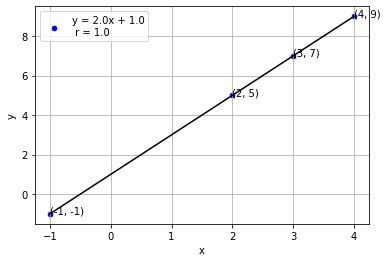

In [721]:
workTable, sumList, n, r, func = Resolution(pd.DataFrame({
    "x" : [3,2,-1,4],
    "y" : [7,5,-1,9],
}))

In [722]:
func(2)

5.0

In [723]:
func(1)

3.0

___

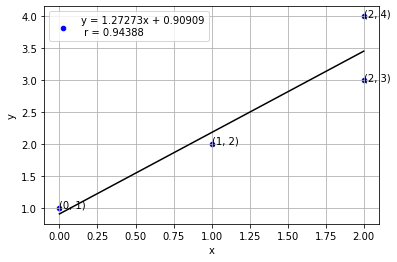

In [724]:
workTable, sumList, n, r, func = Resolution(pd.DataFrame({
    "x" : [0,1,2,2],
    "y" : [1,2,3,4],
}))

In [725]:
workTable

,x,y,x²,y²,xy
1,0,1,0,1,0
2,1,2,1,4,2
3,2,3,4,9,6
4,2,4,4,16,8


In [726]:
sumList

{'x': 5, 'y': 10, 'x²': 9, 'y²': 30, 'xy': 16}

___

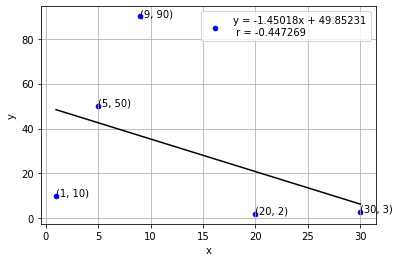

In [727]:
workTable, sumList, n, r, func = Resolution(pd.DataFrame({
    "x" : [1 ,30, 5,20, 9],
    "y" : [10, 3,50, 2,90],
}))

In [728]:
n

5

In [729]:
r

-0.44726942138600606